# Project 1 (CS/STAT24200)

In [77]:
# Run this cell to load packages. You CANNOT load any more packages
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

There has been recent scrutiny of the New York police department's policy of [stop-and-frisk](https://en.wikipedia.org/wiki/Stop-and-frisk_in_New_York_City). The program was controversial because of suggestions of racial profiling, i.e. that some minorities were unfairly targeted by the police.

The dataset frisk.csv includes recordings of NYPD stops for a fifteen-month period in 1998 - 1999. The specific variables contained in this data are:
+ precint: [NYC precint](https://data.cityofnewyork.us/Public-Safety/Police-Precincts/78dh-3ptz) indicator, with values 1, 2, . . . , 75. 
+ eth: Ethnicity indicator, with 1 denoting Black, 2 denoting Hispanic, and 3 denoting White.
+ popl: The total population of a particular ethnicity in a given precint. 
+ crime: Crime category indicator, with 1 denoting violent crimes, 2 denoting weapons crimes, 3 denoting property crimes, and 4 denoting drug crimes.
+ stops: Number of police stops for a specific crime category among individuals of a particular ethnicity in a given precint. 
+ past: The total number of past arrests for a specific crime category among individuals of a particular ethnicity in a given precint.

1) Load the dataset from $\mathtt{frisk.csv}$. The column crime indicates 4 different kinds of crime. For simplicity, we will pool information across crime types. Produce a smaller dataframe called $\mathtt{frisk}$ without the column $\mathtt{crime}$, and with $\mathtt{stops}$ and $\mathtt{past}$ giving the total number of stops and past arrests for that $\mathtt{(precinct,eth)}$ irrespective of crime type. $\mathtt{frisk}$ __must__ have $\mathtt{precinct}$ and $\mathtt{eth}$ as a column names. (You might have to use the method reset_index()) Print the first 10 rows. $\ $   (5pts)

__ (You code should not use for loops, nor depend on the ordering of the rows) __

Partial output:

<code>
     precinct  eth    popl  stops  past
0           1    1    1720    202   980
1           1    2    1368    102   295
2           1    3   23854     81   381
3           2    1    2596    132   753
4           2    2    6844    144   557
5           2    3    9379     71   431
</code>

In [78]:

data = pd.read_csv('frisk.csv')
frisk = data.groupby(['precinct', 'eth'])[['stops', 'past', 'popl']].sum().reset_index()
frisk['popl'] = frisk['popl'] /4


print(frisk.head(10))


   precinct  eth  stops  past     popl
0         1    1    202   980   1720.0
1         1    2    102   295   1368.0
2         1    3     81   381  23854.0
3         2    1    132   753   2596.0
4         2    2    144   557   6844.0
5         2    3     71   431   9379.0
6         3    1    752  2188   2092.0
7         3    2    441   627   3633.0
8         3    3    410  1238  56304.0
9         4    1    385   471   5699.0


In [79]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


2a) Fit a straight line __passing through the origin__ for this data, with $\mathtt{stops}$ as output and $\mathtt{popl}$ as input. Report its slope, saving it in the variable $\mathtt{slope}$. (2pts)

In [80]:

mod = smf.ols(formula = 'stops ~ popl -1', data = frisk )
rslt = mod.fit()
slope = rslt.params.iloc[0]
print(slope)


0.013380758804351545


In [81]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


2b) The slope of the line gives the increase in the number of stops if the population increases by 1 (or put another way, the average number of stops a new person would experience in that period). Under this model, what happens to the number of stops if the population doubles?  $\ $ (1pt)

In this model, if the population doubles, the number of stops would also double.

2c) Plot a scatter plot of population of precinct (x-axis) vs number of stops in that precinct (y-axis), and add the line from the previous cell.    $\ $ (3pts)

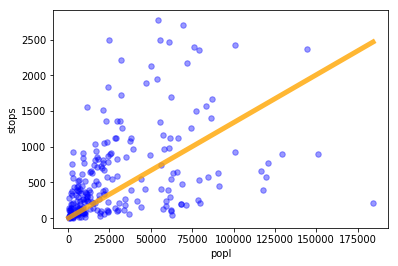

In [82]:


x = np.arange(frisk['popl'].min(), frisk['popl'].max())
frisk_plt = frisk.plot(x = 'popl', y = 'stops', kind = 'scatter', s = 30, color = 'blue', alpha = 0.4 )
frisk_plt.plot(x, x * slope, linewidth = 5, color = 'orange', alpha = 0.8 )


3a) Now fit a _general_ straight line (i.e. not necessarily passing through the origin) for this data, again with $\mathtt{stops}$ as output and $\mathtt{popl}$ as input, and report the parameters as $\mathtt{slope}$ and $\mathtt{intercept}$. (2pts)

In [83]:

mod_2 = smf.ols(formula = 'stops ~ popl', data = frisk )
rslt_2 = mod_2.fit()
slope = rslt_2.params.iloc[1]
intercept = rslt_2.params.iloc[0]
print(slope)
print(intercept)

0.008124416863261274
339.5071828319833


In [84]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


3b) Create another scatterplot of the data with this line plotted.  $\ $ (3pts)

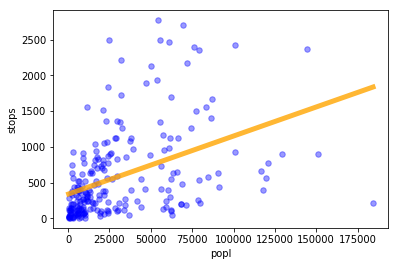

In [85]:


x = np.arange(frisk['popl'].min(), frisk['popl'].max())
frisk_plt = frisk.plot(x = 'popl', y = 'stops', kind = 'scatter', s = 30, color = 'blue', alpha = 0.4 )
frisk_plt.plot(x, intercept + x * slope , linewidth =5, color = 'orange', alpha = 0.8 )



3c) How do you interpret the slope of this new line? Does this new model assume that the number of stops doubles if the population doubles? Does the new model fit the data better? Briefly explain your answer.   $\ $ (2pts)

__Note:__ The intercept of this line gives the number of stops when the population equals 0. Clearly, this does not make any sense. However, in practice, we are not interested in such input values. Including the intercept allows us to better fit the data for useful input values. It is important to not blindly extrapolate to values where the model is unreasonable, or where we haven't seen any data.

In [86]:
# The slope represents the predicted change in stops for every one additional person. The model doesn't assume that the number of stops doubles if the population doubles due to the prescence of the y-intercept.
# This model would fit the data better because this model doesnt force the line through the origin and we can actually see how the line naturally flows based on the actual data.

The previous model assumes the numbers of stops in a precinct depends only on the precinct's population. Another approach is to model the number of stops in a precinct as a function of the precinct's crime rate. As a proxy for crime rate, we will use the number of arrests in the previous year (column $\mathtt{past}$).

4a) Fit a linear function with $\mathtt{past}$ as input and $\mathtt{stops}$ as output, and report the slope and intercept as $\mathtt{slope}$ and $\mathtt{intercept}$. $\ $ (2pts)

In [87]:

model = smf.ols(formula = 'stops ~ past', data = frisk)
result = model.fit()
slope = result.params.iloc[1]
intercept = result.params.iloc[0]
print(slope)
print(intercept)

0.40416481103999674
159.196710050712


In [88]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


4b) Plot a scatterplot of $\mathtt{past}$ vs $\mathtt{stops}$, along with the fitted line. What is the interpretation of the slope of this line?  $\ $ (3pts)

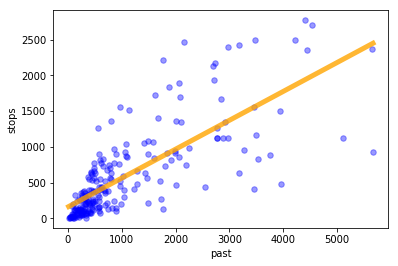

In [89]:

x = np.arange(frisk['past'].min(), frisk['past'].max())
frisk_plt = frisk.plot(x = 'past', y = 'stops', kind = 'scatter', s = 30, color = 'blue', alpha = 0.4)
frisk_plt.plot(x, intercept + x * slope, linewidth = 5, color = 'orange', alpha = 0.8 )


##For every increase of one past arrest, the predicted change of stops will be about 0.404 more.

4c) Briefly suggest any problems with using past arrests as a proxy for crime rate.  $\ $ (1pt)

In [90]:
##One problem is the fact that arrests doesn't equal the number of crimes committed. Many crimes occur without an arrest being made. The arrests solely represent the crimes committed where the police caught the criminal but all the crimes committed where the police don't catch them isn't taken into consideration.   

5a) In general, we expect the number of stops to depend on both population size and crime rate. Fit a linear model with $\mathtt{stops}$ as the output, and both $\mathtt{popl}$ __and__ $\mathtt{past}$ as inputs. Report the fitted parameters as intercept, slope\_popl and slope\_past. $\ $ (2pts)

In [91]:


model = smf.ols(formula = 'stops ~ popl + past', data = frisk)
result = model.fit()
intercept = result.params.iloc[0]
slope_popl = result.params.iloc[1]
slope_past = result.params.iloc[2]

In [92]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


5b)This model breaks down the number of stops as dependent on two factors, population size and crime rate.What is the interpretation of the coefficients of $\mathtt{popl}$ and $\mathtt{past}$? $ $ (1pts)

In [93]:

##coefficient for popl represents the average predicted change in the number of stops for every one unit increase in population assuming past crime rate stays constant and the coefficient for past represents the 
##average predicted change in the number of stops for every one unit increase in the past crime rate assuming the population size remains constant.


6a) Again produce scatterplots of popl vs stops and past vs stops, now coloring each point according to the value of eth. Use a clear colormap (e.g. 'gist_rainbow') as an argument for scatter (6pts)

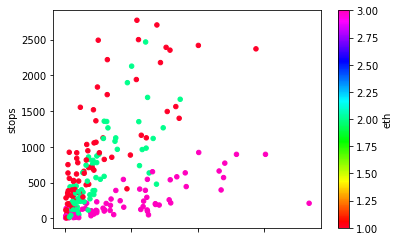

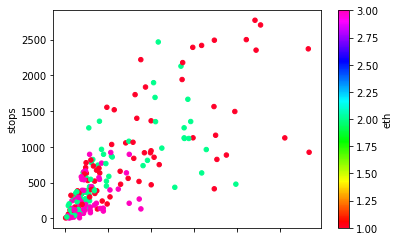

In [94]:

frisk.plot.scatter(x = 'popl', y = 'stops', c = 'eth', cmap = 'gist_rainbow' )
frisk.plot.scatter(x = 'past', y = 'stops', c = 'eth', cmap = 'gist_rainbow')


7a) Create a new dataframe called eth\_count from frisk with 3 rows called 'black', 'hispanic' and 'white', and three columns 'stops', 'popl' and 'past'. Each element of $\mathtt{stops}$ should give the total number of stops for the 3 groups, and similarly for $\mathtt{popl}$ and $\mathtt{past}$. $\ $ (4pts)

In [95]:

eth_count = frisk.groupby('eth')[['stops', 'popl', 'past']].sum()
eth_count.index = ['black', 'hispanic', 'white']

In [96]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


7b) Divide each column of eth_count by its sum, producing a new dataframe called eth_prop. Here, each element of $\mathtt{stops}$ should give the proportion of stops for the 3 groups, and similarly for popl and past. $\ $ (2pts)

In [97]:

eth_prop = eth_count / eth_count.sum()



In [98]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


8a) Creat a barplot from eth_prop consisting of 3 groups, 'black', 'hispanic' and 'white'. Each group should have 3 different colored bars giving the proportion that group forms of total stops, population and past arrests. You can use the pandas method .plot.bar() $\ $ (3pts)

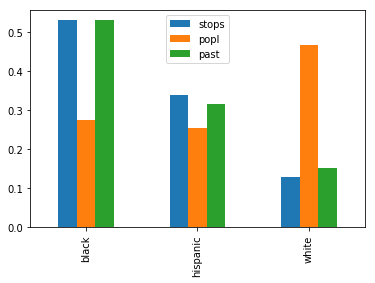

In [99]:

eth_prop.plot.bar()



8b) Creat a barplot from eth_prop consisting of 3 groups, 'stops', 'popl' and 'past'. Each group should have 3 different colored bars giving the proportion of blacks, hispanics and whites for that group (this is just a reorganization of the previous barplot).  $\ $ (3pts)

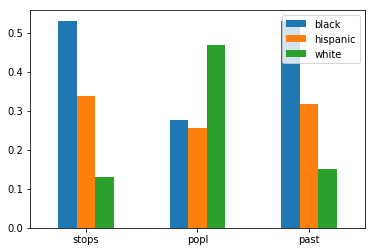

In [100]:

eth_prop.T.plot.bar(rot = 0)

Looking at the plots above, an opponent of stop-and-frisk would claim the the number of times a black or hispanic person was stopped was disproportionate to their population size. A supporter of the policy would argue that the stops are proportionate with past arrests (or crime-rate). To better understand this, we need to simultaneously understand the effects of both population and crime rate.

9) Fit separate linear models with stops as output, and popl and past as input for each ethnic group. Report the parameters. It is difficult to compare slopes if each model has a different intercept, therefore we will force them to pass through the origin. Save the parameters as black_past, black_popl, hisp_past, hisp_popl, white_past and white_popl. Briefly summarize the results. (5pts)

In [101]:
###
### YOUR CODE HERE
###
black_data = frisk[frisk['eth'] == 1]
hisp_data = frisk[frisk['eth'] == 2]
white_data = frisk[frisk['eth'] == 3]

mod_black = smf.ols(formula = ' stops ~ popl + past -1', data = black_data)
black_results = mod_black.fit()
black_popl = black_results.params.iloc[0]
black_past = black_results.params.iloc[1]


mod_hispanic = smf.ols(formula = ' stops ~ popl + past -1', data = hisp_data)
hispanic_results = mod_hispanic.fit()
hisp_popl = hispanic_results.params.iloc[0]
hisp_past = hispanic_results.params.iloc[1]



mod_white = smf.ols(formula = ' stops ~ popl + past -1', data = white_data)
white_results = mod_white.fit()
white_popl = white_results.params.iloc[0]
white_past = white_results.params.iloc[1]

print(white_popl)    
print(white_past)
print(black_popl)
print(black_past)
print(hisp_popl)
print(hisp_past)

## In order from least to greatest, the order for population coefficients are: white, black, hispanic.
## In order from least to greatest, the order for past arrest coefficients are: hispanic, white, black 


0.0038019461252109064
0.137792403733428
0.013459761357059223
0.2769406088216728
0.01877069896323467
0.10516913201638939


In [102]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Instead of three models on three datasets (for each group) it is more informative to fit a single model on a single dataset that also includes group information.


10) Towards this, first add 3 columns to $\mathtt{frisk}$, 'black', 'hispanic' and 'white'. Elements of these should be 0 unless the row belongs to the corresponding column, in which case it should be 1 (e.g. if eth = 1, these columns have values (1,0,0) respectively). This is a one-hot encoding of the column $\mathtt{eth}$. 

 Fit a linear model with $\mathtt{stops}$ as output, and $\mathtt{popl, past, black}$ and $\mathtt{hisp}$ as inputs. Report the parameters as intercept, slope_past, slope_popl, slope_black and slope_hisp.  $\ $ (5pts)

In [103]:

frisk['black'] = (frisk['eth'] == 1 ).astype(int)
frisk['hispanic'] = (frisk['eth'] == 2).astype(int)
frisk['white'] = (frisk['eth'] == 3).astype(int)

model = smf.ols(formula = 'stops ~ popl + past + black + hispanic', data = frisk)
results = model.fit()

intercept = results.params.iloc[0]
slope_popl = results.params.iloc[1]
slope_past = results.params.iloc[2]
slope_black = results.params.iloc[3]
slope_hisp = results.params.iloc[4]

print(intercept)
print(slope_popl)
print(slope_past)
print(slope_black)
print(slope_hisp)


-156.28994640037735
0.006038616694194835
0.26504649812513836
492.74587447489023
347.10379814952586


In [104]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


__Note__: We are not using the column 'white' as an input, rather this is taken as default, so that the slope and intercepts correspond to the white population. The coefficient of black gives the change in the number of stops if that population were a black instead of white, for the _same_ population size and crime rate. Similarly for the coefficient of hispanic. The current dataset would have no evidence of police bias if these two coefficients were close to 0.

11) Comment briefly on what you think the coefficients of the previous regressions tell you. $\ $ (2pts)

In [105]:

##In question 9, the coefficients show us the relationship between stops and population + past arrests for each ethnicity. 
## Based on the population coefficients, black and hispanic people are stopped more often relative to their population size as opposed 
##to white people. This shows that race is a big factor in stopping someone, and there may be racial bias. Based on the past coefficient, for the black population, a history 
##of past arrests leads to stops at about double the rate of white people. Hispanic people do have a lower rate than white people which doesn't align
## with the order of the population coefficients as hispanic people had the highest population coefficient. This shows that for hispanic people, population is a bigger factor than past arrests for total stops.

##In question 10, the coefficients of black and hispanic are significantly larger than 0 which indicates heavy police bias. When population 
## and past arrests are controlled, black and hispanic people were stopped much more often than white people. On top of this, 
## the model shows that past arrests is a bigger factor for total stops than population size.

##Overall, both regressions show heavy evidence of racial bias in police stops.


As a last (and simpler) model, we note that with count data (e.g. population size, number of stops etc), it is often more convenient to work with log-counts rather than counts. 

12a) Add 3 new columns to frisk, $\mathtt{logstops, logpast}$ and $\mathtt{logpopl}$ obtained by taking logarithms of the corresponding columns. How many zeroes are present in columns $\mathtt{stops, past}$ and $\mathtt{popl}$? To avoid taking logs of 0, you can add a small number (0.001) to these columns before taking log. 

Fit a straight line with $\mathtt{logstops}$ as output and $(\mathtt{logpopl, logpast})$ as inputs. Report its parameters as intercept, slope_logpopl and slope_logpast. $\ $ (5pts)


__Note:__ the coefficient in this log-log model has a slightly more complicated interpretation, giving the percent change in output if the input changes by 1 percent. It economics, this coefficient is called _elasticity_.

In [106]:

frisk['stops'] = frisk['stops'] + 0.01
frisk['past'] = frisk['past'] + 0.01
frisk['popl'] = frisk['popl'] + 0.01

frisk['logstops'] = np.log(frisk['stops'])
frisk['logpast'] = np.log(frisk['past'])
frisk['logpopl'] = np.log(frisk['popl'])

model = smf.ols(formula = 'logstops ~ logpopl + logpast', data = frisk)
results = model.fit()

intercept = results.params.iloc[0]
slope_logpopl = results.params.iloc[1]
slope_logpast = results.params.iloc[2]

In [107]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###



12b) Plot a scatter plot of log-population of precinct (x-axis) vs log-number of stops in that precinct (y-axis). 
  $\ $ (2pts)

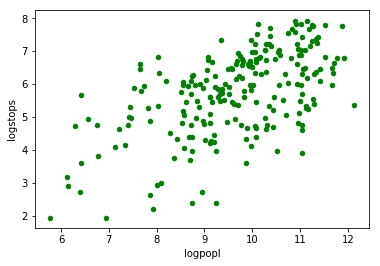

In [108]:

frisk.plot.scatter(x = 'logpopl', y = 'logstops',  c = 'green')


13) We have 4 interesting models for perdicting $\mathtt{stops}$, with inputs $\mathtt{(popl), (past), (popl,past)}$ and $\mathtt{(popl,past,black,hisp)}$. Our last model predicts log-stops from log-popl and log-past. We want to decide which one is most appropriate. We do this using cross-validation (see the slides) $\ $ (15 pts)
+ Recall we have 75 precincts. For each 'fold' of cross-validation, we will hold out 5 precincts, train the models on the rest, and then test on 5 held-out precincts (15 datapoints). Thus there will be a total of 75/5 = 15 folds.
+ For each fold and for each model, calculate the sum-squared-error between the predicted number of stops for the test data, and the true number of stops. For each model, store the parameters and sum-squared errors as a dataframe with 15 rows. Call these dataframes crossval1, crossval2,... crossval5.

__Note__: 
+ _the last model predicts logstops, not stops. To avoid comparing apples and oranges, convert its output to stops before computing sum-squared-error._

+ You can use a for loop over the cross-validation folds.

In [109]:

frisk['logstops'] = np.log(frisk['stops'] + 0.01)
frisk['logpast'] = np.log(frisk['past'] + 0.01)
frisk['logpopl'] = np.log(frisk['popl'] + 0.01)

precincts = frisk['precinct'].unique()
folds = 15

crossval1 = pd.DataFrame()
crossval2 = pd.DataFrame()
crossval3 = pd.DataFrame()
crossval4 = pd.DataFrame()
crossval5 = pd.DataFrame()

dataframes = [crossval1, crossval2, crossval3, crossval4, crossval5 ]

formulas = ['stops ~ popl', 'stops ~ past', 'stops ~ popl + past', 'stops ~ popl + past + black + hispanic', 'logstops ~ logpopl + logpast']


for i in range(folds):
    test_precincts = precincts[i * 5: (i + 1) * 5]
    test_set = frisk[frisk['precinct'].isin(test_precincts)]
    train_set = frisk[~frisk['precinct'].isin(test_precincts)]
    
    for idx, formula in enumerate(formulas):
        res = smf.ols(formula, data = train_set ).fit()
        
        preds = res.predict(test_set)
        
        if idx ==4:
            preds = np.exp(preds) - 0.01
            
        sse = np.sum((test_set['stops']- preds)** 2)
        
        fold_results = res.params.to_dict()
        fold_results['sse'] = sse
        
        
        dataframes[idx] = pd.concat([dataframes[idx], pd.DataFrame([fold_results])], ignore_index = True  )
        
        
        
crossval1, crossval2, crossval3, crossval4, crossval5 = dataframes

14a) Create a plot consisting of 5 boxplots, giving the test sum-squared errors for the 5 models across all the folds. What do you think the ordering of models is in terms of predictive performance, explaining clearly what criteria you used to order them.  $\ $ (5pts)

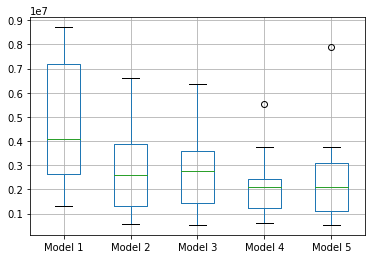

In [111]:

all_sse = pd.DataFrame({'Model 1': crossval1['sse'], 'Model 2': crossval2['sse'], 'Model 3': crossval3['sse'], 'Model 4': crossval4['sse'], 'Model 5': crossval5['sse']}
                      )
all_sse.boxplot()

## In terms of predictive performance from least to greatest, I think it would be Model 1 (stops ~ popl), Model 3 (stops ~ popl + past), 
## Model 2(stops ~ past), Model 5(logstops ~ logpopl + logpast), Model 4(stops ~ popl + past + black + hispanic). The criteria 
## I used to rank the models are, median, IQR, and outliers. A lower median means that on average, the model's predictions are closer to the truth.
## A smaller IQR indicates that the model is consistent in its predictions. In general, having less outliers is better because
## having a bigger outlier means the model failed terribly in a certain precinct. Models will have different things over other models, and there
## is a lot of overlap, but taking all 3 factors into consideration, these were my model rankings.


14b) Create a plot consisting of 2 boxplots, the coefficients of the parameters 'black' and 'hispanic' for the 4th model across all folds. Also summarize it using the describe method. Do you think the estimates vary a lot across different folds?  $\ $ (6 pts)

            black    hispanic
count   15.000000   15.000000
mean   491.861998  346.578121
std     19.478170   16.489292
min    455.781902  318.326872
25%    482.218135  334.868262
50%    487.187266  341.238642
75%    507.122379  360.467200
max    525.430667  373.690442


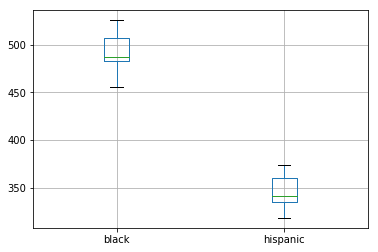

In [112]:

coeff_data = crossval4[['black', 'hispanic']]

coeff_data.boxplot()
print(coeff_data.describe())


## I think the estimates don't vary a lot across the different folds. For black, the mean is about 491.86 and std is about 19.48. This means
## the variation is only about 4% of the average value. For hispanic, the mean is about 346.58 and std is 16.49. The variation 
## is only about 4.7% of the average value. These are pretty low variations which indicates the estimates don't really vary that much across the folds.


__Conclusion__: A thorough assessment of the stop-and-frisk policy requires for sophisticated modeling (e.g. nonlinearities and interaction terms), more kinds of data (e.g. what proportion of stopped people were found to be innocent? Did the policy actually result in a reduction in crime? Is any reduction in crime worth the loss in civil liberties?). See e.g. [here](https://www.nyclu.org/en/stop-and-frisk-data). Nevertheless, it is widely agreed now that this was an unfair and harmful policy. If you are interested, [here](https://www.huffpost.com/entry/nypd-stop-and-frisks-15-shocking-facts_n_1513362) is an article from the left, and [here](https://www.nationalreview.com/2018/01/new-york-city-stop-and-frisk-crime-decline-conservatives-wrong/) is one from the right.